<img src="../img/crowdlearning-etic.png" alt="Logo ETIC" align="right">


<h1><font color="#004D7F" size=6>Lab-1 Regresión</font></h1>

<br>
<br>
<br>
<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Antonio Jesús Gil</font><br>
<font color="#004D7F" size=3>Fundamentos de Machine Learning</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Regresión/Clasificación con SciKit Learn](#section1)
* [2. Ejemplo Regresión Lineal](#section2)
* [3. Ejercicios de Regresión Lineal](#section3)

# <font color="#004D7F">2 Regresion Lineal </font>

---

## <font color="#004D7F"> Ejercicio Housing</font>



<a id="section21"></a>
### <font color="#004D7F"> Housing: Obtener datos</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing = pd.read_csv('USA_housing.csv')

In [ ]:
print(housing.shape)
housing.head(5)
housing.info()
housing.describe()

In [ ]:
# Analysis on Each Pair of Features
sns.pairplot(housing)

In [ ]:
sns.distplot(housing['Price'])

In [ ]:
sns.jointplot(x=housing['Price'], y=housing['Avg. Area Income'], kind='kde');

In [ ]:
sns.heatmap(housing.corr(), annot=True)

### <font color="#004D7F"> Housing: Entrenar el modelo</font>

Para ello dividiremos el conjunto en datos de prueba `test` y datos de entrenamiento `fit`

El eje X contendrá todas las columnas características y el eje Y contendrá el target de salida.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
housing.columns

In [ ]:
X = housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
Y = housing['Price']

In [ ]:
# crear las variables para dividir en datos de entrenamiento y prueba
# Y_test nos servira para evaluar el model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print("datos de entrenamiento caracteristicas, eje X\n", X_train.head(3))
print("datos de test caracteristicas, eje X\n", X_test.head(3))

In [ ]:
print("datos de entrenamiento target, eje Y\n", Y_train.head(3))
print("\ndatos de test, eje Y\n", Y_test.head(3))

In [ ]:
# Entrenar el modelo mediante el metodo fit usando una variable que sera una instancia de 
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

### <font color="#004D7F"> Housing: Evaluar el modelo</font>

Usamos el metodo `predict`

In [ ]:
from sklearn import metrics

In [ ]:
# pasamos como parámetros las caracteristicas de pruebas y genera las predicciones
housing_pred = lrm.predict(X_test)

Los datos predecidos deben ser comparados con el precio real para disponer de una aproximación al modelo o si por el contrario hemos de reajustar.

* Calcular la diferencia entre los precios `Y_test` menos `housing_pred`

Hay que tener en cuenta que `housing_predict`es una lista y `Y_test` es un NDArray

In [ ]:
print("Predicción sobre los datos de test , eje X\n", housing_pred[0:3])
housing_pred.dtype

In [ ]:
# La diferecia entre los precios es el error: Y_test - housing_pred
print("\ndatos de test, eje Y\n", Y_test.head(3))
Y_test.dtype

In [ ]:
# Gráfico para ver las diferencias de tipo scatter
plt.scatter(Y_test, housing_pred)

In [ ]:
sns.jointplot(x=Y_test, y=housing_pred, kind='kde');

In [ ]:
sns.distplot(Y_test - housing_pred)
# El error se acerca mucho a la distribución normal.

In [ ]:
# Metricas para evaluar el modelo
#1. MAE -> Mean absolute error, la media del valor absoluto de los errores
# 2. MSE -> media de los errores al cuadrado
# 3. RMSE -> raiz cuadrada de los errores al cuadrado
metrics.mean_absolute_error(Y_test, housing_pred) # cuanto más bajo sea el valor, mejor es el modelo
print("Mean absolute error: %.1f" % metrics.mean_absolute_error(Y_test, housing_pred))

In [ ]:
metrics.mean_squared_error(Y_test, housing_pred) 

In [ ]:
np.sqrt(metrics.mean_squared_error(Y_test, housing_pred))

In [ ]:
# Mean absolute error:
print("Mean absolute error: %.1f" % metrics.mean_absolute_error(Y_test, housing_pred))

# R2 score:
print('R2 Score: %.2f' % metrics.r2_score(Y_test, housing_pred))

# Mean squared error:
print('Mean squared error: %.2f' % metrics.mean_squared_error(Y_test, housing_pred))

In [ ]:
print(Y_test['Price']) 

In [ ]:
#Compare actual value and predicted value:

Y_test['Pred'] = housing_pred
#Y_test['Difference'] = abs(Y_test['Pred'] - Y_test['Price'])
# Y_test.head()
#print(Y_test['Pred'])


## <font color="#004D7F">Ejercicio Boston R. L.</font>

La base de datos boston es un dicionario que contiene gran cantidad de datos relacionados con la ciudad

In [ ]:
#Import libraries
import numpy
import pandas as pd
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from sklearn.cross_validation import KFold
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import spline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge


In [ ]:
boston = load_boston()
print(boston.data.shape)
boston.keys()

In [ ]:
boston.DESCR

In [ ]:
# Get the attributes or features of the data

boston.feature_names

In [ ]:
#bostondf = pd.DataFrame(boston.data, columns=boston.feature_names)

#bostondf.head(4)
#bostondf.shape

boston_data = pd.DataFrame(boston['data'], columns=boston.feature_names)
boston_target = pd.DataFrame(boston['target'], columns={'Target'})
print(boston_data.head(2))
print(boston_target.head(2))

In [ ]:

# creamos un objeto con los parámetros por defecto
lr = LinearRegression()

# entrenamos con los datos de entrada y la salida
lr.fit(boston_data,boston_target)

# obtenemos una predicción para los datos de pima
boston_predictionf

# comparamos estos datos con el error cuadrático medio
from sklearn.metrics import mean_squared_error
print('Error cuadrático medio:')
print(mean_squared_error(boston_target, boston_prediction))

# y obtenemos directamente el score
print('Coeficiente R2 de la función score:')
print(lr.score(boston_data,boston_target))

In [ ]:
#First, check for missing information.
#bostondf.isnull().sum()

In [ ]:
# Separar las variables dependent and independent variables
#boston_data_X = bostondf[bostondf.columns[0:13]]
#boston_data_Y = bostondf[bostondf.columns[13:14]]

In [ ]:
#Check the correlation
boston_data.corr()

In [ ]:
#Visualize correlation between attributes by using heatmap
seaborn.heatmap(boston_data.corr())

In [ ]:
# Feature contains high correlation. We need to remove them first before applying regression techniques.
# Create correlation matrix
abs_corr_matrix = boston_data.corr().abs()

In [ ]:
# Select upper triangle of matrix
up_tri = abs_corr_matrix.where(numpy.triu(numpy.ones(abs_corr_matrix.shape), k=1).astype(numpy.bool))

# Find all the features which is having correlation > 0.75 with other features.
correlated_features = [column for column in up_tri.columns if any(up_tri[column] > 0.75)]

#Print correlated_features
print(correlated_features)

In [ ]:
#Drop correlated features:

boston_data = boston_data.drop(correlated_features, axis=1)

In [ ]:
#Divide the data into training and test set. Train set contains 80% of the data. Test set contains 20% of the data.

X_train, X_test, Y_train, Y_test = train_test_split(boston_data, boston_target, test_size=0.20)

In [ ]:
#Create object of multiple linear regression:
linear_regression = LinearRegression()

In [ ]:
# Fit the model:
linear_regression.fit(X_train, Y_train)

In [ ]:
# Make prediction on test data:

Y_pred = linear_regression.predict(X_test)


In [ ]:
# Mean squared error:
print("Mean squared error: %.1f" % mean_squared_error(Y_test,Y_pred))

# R2 score:
print('R2 Score: %.2f' % r2_score(Y_test,Y_pred))

# Mean absolute error:
print('Mean absolute error: %.2f' % mean_absolute_error(Y_test,Y_pred))


In [ ]:
# Compare actual value and predicted value:

Y_test['Predecido'] = Y_pred
Y_test['Diferencia'] = abs(Y_test['Predecido'] - Y_test['Target'])
Y_test.head()

In [ ]:
#df2 = pd.DataFrame({'Actual': Y_test, 'Predecido': Y_pred, 'Diferencia':abs(Y_test - Y_pred)})
#df2.head(5)
df = pd.DataFrame({'Actual': Y_test, 'Predecido': Y_pred})
df.head(5)

# <font color="#004D7F">2 Regresion Logistica </font>


## <font color="#004D7F">Ejercicio Wisconsin </font>

In [ ]:
# Wisconsin
# creamos un objeto con los parámetros por defecto
#lr = LogisticRegression(solver='lbfgs', tol = 0.1)
lr = LogisticRegression()

# entrenamos con los datos de entrada y la salida
lr.fit(wisconsin_data,wisconsin_target)

# obtenemos una predicción para los datos de pima
wisconsin_prediction = lr.predict(wisconsin_data)

# comparamos estos datos con el error cuadrático medio
from sklearn.metrics import mean_squared_error
print('Error cuadrático medio:')
print(mean_squared_error(wisconsin_target, wisconsin_prediction))

# y obtenemos directamente el score
print('Coeficiente R2 de la función score:')
print(lr.score(wisconsin_data,wisconsin_target))

In [ ]:
# creamos un objeto con los parámetros por defecto
#lr = LogisticRegression(solver='lbfgs', tol = 0.1, max_iter=5)
lr = LogisticRegression(tol = 0.1)
#lr = LogisticRegression()

# entrenamos con los datos de entrada y la salida
lr.fit(mnist_data,mnist_target)

# obtenemos una predicción para los datos de pima
mnist_prediction = lr.predict(mnist_data)

# comparamos estos datos con el error cuadrático medio
from sklearn.metrics import mean_squared_error
print('Error cuadrático medio:')
print(mean_squared_error(mnist_target, mnist_prediction))

# y obtenemos directamente el score
print('Coeficiente R2 de la función score:')
print(lr.score(mnist_data,mnist_target))

## <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Matriz de confusion - Teoria</font> 

In [ ]:
import sklearn.datasets
wisconsin = sklearn.datasets.load_breast_cancer()
wisconsin.keys()
wisconsin_data = wisconsin['data']
wisconsin_target = wisconsin['target']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
X = wisconsin_data
Y = wisconsin_target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

lr = LogisticRegression()

lr.fit(X_train, Y_train)
predicciones = lr.predict(X_test)
print('Tasa de acierto o accuracy clasificador en el entorno de test: {:.2f}'.format(lr.score(X_test, Y_test)))

# Matriz de confusion
mc= confusion_matrix(y_true= Y_test, y_pred=predicciones)
clases = np.unique(Y)
print('Clase real\n  {:}   {:}'.format(clases[0],clases[1]))
print(mc)
print('\nTP={:d} TN={:d}'.format(mc[0,0], mc[1,1]))
print('FP={:d}  FN={:d}'.format(mc[1,0], mc[0,1]))


## <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio:  Análisis de datos en <i>Marketing</i></font> 

El objetivo final consiste en elaborar un modelo de detección del abandono. Estos pasos pueden servir de orientación en el desarrollo:

- En este caso, se parte de un solo conjunto de datos, que se debe dividir en una partición de entrenamiento y otra de test, que se utilizará para validar.

- Como paso previo, es puede ser interesante explorar la distribución de la clase. Para ello, puede hacerse, por ejemplo, un gráfico de barras.

- Por último, habría que reportar el rendimiento (en acierto y coste) sobre el conjunto de test.

Para la realización del ejercicio, se proporciona un conjunto de datos, denominado, `datos/churn/customerChurnAnalysis.csv`, relativo al abandono en una operadora de telecomunicaciones. 

In [ ]:
import pandas as pd
df = pd.read_csv('./datos/churn/customerChurnAnalysis.csv')
df.shape

In [ ]:
df.head(3)

In [ ]:
df.columns

In [ ]:
df.drop(['state','international plan','voice mail plan'], axis=1, inplace=True)

In [ ]:
## Aqui una función para que cambie todos los object
# Funcion no válida para boolean porque genera una matriz erronea
## Este es el error que devuelve: LinAlgError: Singular matriz

def encoder(df):
    '''Manejo de campos categoricos para poder ser utilizados en scikit Learn'''
    for col in df.columns:
        if df.dtypes[col] == 'object':
            label_encoder = preprocessing.LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
    return df

In [ ]:
# encoder(df)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

In [ ]:
df.head(3)

In [ ]:
df.to_csv('customerChurnAnalysisModified.csv')
#df.to_csv(.\datos)

In [ ]:
from sklearn.model_selection import train_test_split
# Particiones train y test
#y = df.iloc[:,19].values
#data = df.iloc[:,0:19].values
y = df["churn"]
X = df[['account length','area code','number vmail messages','total day minutes',
           'total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes',
           'total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']]
   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Partición para train: ", X_train.shape, y_train.shape)
print("Partición para test: ", X_test.shape , y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy del clasificador en el entorno de test: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

sns.heatmap(confusion_matrix, annot=True,  fmt='');
title = 'Matriz de Confusión sobre Regresión Logística con fit regularizado a 0.5'
plt.title(title);

# <font color="#004D7F">4 Transformaciones</font>

En este caso, los valores perdidos han sido sustituidos por la media de los valores conocidos en `bareNuclei`. Si vamos a la documentación del `Imputer` en https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html, podremos observar los diferentes parámetros de configuración del algoritmo. Si queremos modificar el comportamiento del algoritmo deberemos definir estos parámetros
en el constructor cuando creemos el objeto. 

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 1: Valores perdidos por la moda</font>

En este primer ejercicio se pide utilizar la mediana en vez de la media para rellenar los valores perdidos de `wisconsin_data`.

In [ ]:
import pandas as pd
wisconsin = pd.read_csv('wisconsin.csv')
#wisconsin.head(5)
wisconsin_data = wisconsin.drop('label',1)
wisconsin_target = wisconsin['label']
wisconsin_data.isnull().sum()

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_moda = SimpleImputer()
imp_mmoda = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_moda.fit(wisconsin_data)
wisconsin_trans_moda = imp_moda.transform(wisconsin_data)
wisconsin_trans_moda = pd.DataFrame(wisconsin_trans_moda, columns = wisconsin_data.columns)

# Si volvemos a comprobar los NaN's en la nueva base de datos, vemos que ya no hay
print(np.sum(np.isnan(wisconsin_trans_moda)))

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 2: Nuevas variables polinomiales de grado 2 en Pima</font> 

La forma de utilizar el algoritmo es igual que con `Imputer`, por eso se pide que utilizando `fit` y `transform` o `fit_transform`, se obtenga de `pima_data` una nueva base de datos llamada `pima_pol` aplicando `PolynomialFeatures`. Imprimir cuantas variables tiene ahora la base de datos y su nombre. Para obtener el nombre de las nuevas características mirar la función `get_feature_names` de la documentación en http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

Se pide: 

Aplicar este transformador en una nueva variable denominada `pima_pol` de igual manera que en el ejercio anterior.
Se obtendran muchas variables nuevas a partir de las originales ¿nombre? ¿como se han generado? ¿como estan ordenadas?

In [ ]:
import sklearn.datasets
pima = sklearn.datasets.load_diabetes()
pima_data = pima['data']
pima_target = pima['target']

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
pima_pol = poly.fit_transform(pima_data)
#print(poly.fit_transform(pima_data))
pima_pol

In [ ]:
print(pima_pol.shape)

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 3: Dígitos de MNIST normalizados por la media</font> 

Se pide de la misma forma que en el caso anterior, se pruebe este transformador y que se obtenga una nueva base de datos mnist_scaler y que se comparen los dígitos imprimidos antes con los transformados.

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(mnist_data)

print(np.sum(np.isnan(X_train)))

# <font color="#004D7F"> 3 Validación cruzada, wisconsin</font> 

## <font color="#004D7F"> wisconsin</font> 

Ejemplo con particion continua

In [ ]:
import numpy as np
import sklearn.datasets
wisconsin = sklearn.datasets.load_breast_cancer()
wisconsin.keys()
wisconsin_data = wisconsin['data']
wisconsin_target = wisconsin['target']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = wisconsin_data
y = wisconsin_target

lr = LogisticRegression()
acc = np.empty(10)

for i in range(0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=i*i)
    lr.fit(X_train, Y_train)
    acc[i] = lr.score(X_test, Y_test)
    print('{:.4f}' .format(acc[i]))

print('Acc: {:.4f} Std: {:.4f}'.format(np.mean(acc), np.std(acc)))

Ejercicio 1 validacion cruzada wisconsin dataset universidad 

In [ ]:
## Primer renglon

from sklearn.linear_model import LinearRegression, LogisticRegression
#seleccionamos el modelo de regresión apropiado. ¿LinearRegression o LogisticRegression?
lr = ???

#lo entrenamos
##lr. ???
lr.fit(X, Y)
#evaluamos el modelo con la misma base de datos con la que se ha entrenado
acc = lr.score(X,Y)
print('{:.4f}'.format(acc))
# 0.9596

In [ ]:
## Segundo renglon
from sklearn.model_selection import train_test_split

X_t, X_T, Y_t, Y_T = train_test_split(X,Y,test_size=0.3, random_state=10) #random_state es la semilla para la partición aleatoria
##lr. ???
lr.fit(X_t, Y_t)
#acc = lr. ???
acc = lr.score(X_T,Y_T)
print('{:.4f}'.format(acc))
# 0.9474

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>Intro a Validación cruzada, wisconsin</font> 
Ejemplo con validación cruzada

In [ ]:
import numpy as np
import sklearn.datasets
wisconsin = sklearn.datasets.load_breast_cancer()
wisconsin.keys()
wisconsin_data = wisconsin['data']
wisconsin_target = wisconsin['target']
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
X = wisconsin_data
Y = wisconsin_target

K=5
acc = []
lr = LogisticRegression()
skf = StratifiedKFold(n_splits=K, random_state=1)

for train_indices, test_indices in skf.split(X,Y):
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    lr.fit(X_train, Y_train)
    acc.append(lr.score(X_test, Y_test))
    print(acc[-1])

print('Acc: {:.4f} Std: {:.4f}'.format(np.mean(acc), np.std(acc)))

## Logistic Regression 3-class Classifier

In [ ]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Ejemplo de Métricas para clasificación

In [ ]:
import sklearn.metrics as metrics
print('Precisión:',  metrics.precision_score(y,y_pred))
print('Recall: ', metrics.recall_score(y,y_pred))
print('F-Score: ', metrics.f1_score(y,y_pred))
print('Matriz de confusión: ', metrics.confusion_matrix(y,y_pred))

# <font color="#004D7F"> 5 Selección de Variables</font> 
## <font color="#004D7F"> 5 Selección de Variables</font> 

### Regresion Lineal utilizando Lasso

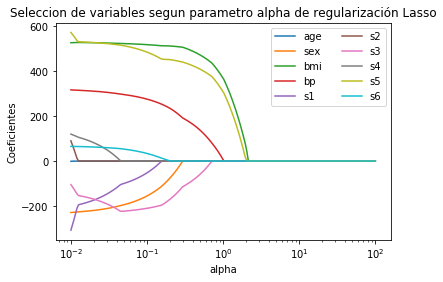

In [6]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

datos = sklearn.datasets.load_diabetes()
X = datos.data
Y = datos.target
nvars = X.shape[1]
n_alphas = 200
alphas = np.logspace(2, -2, n_alphas)
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X,Y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
coefs= np.array(coefs)

for i in range(nvars):
    plt.plot(alphas, coefs[:,i], label= datos.feature_names[i])

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coeficientes')
plt.title('Seleccion de variables segun parametro alpha de regularización Lasso')

plt.legend(loc='upper right')
ax.legend(loc='upper right', ncol=2, fancybox=True)

¿Que valor darías a $\alpha$ para quedarte con las 5 variables más influyentes?

### Regresion Logística utilizando Lasso

# <font color="#004D7F"> 5 Selección de Variables - Métricas filter</font> 

### Métricas univariadas para problemas de clasificación

> Test paramétrico ANOVA, tiene como hipótesis nula el que, para cada posible valor de la clase, la media de una variable no varía. Solo captura relaciones lineales

> MI, Mutual Information, captura cualquier tipo de relación

Cuanto mayor es el valor de la métrica, más relacion del atributo con la clase. Un valor 0 significa independencia total entre variables.

## <font color="#004D7F"> Ranking por test ANOVA</font> 
### Seleccionar las K mejores variables con SelectKBest 

Ranking: [27 22  7 20  2  0 23  3  6 26]


Text(0.5, 0, 'Indice de la variable')

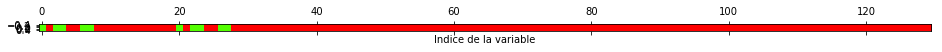

In [26]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

datos = sklearn.datasets.load_breast_cancer()
X = datos.data
Y = datos.target
# Añadimos 100 variables con ruido despues de las 30 originales 
# No deberian ser seleccionadas
semilla = 0
random = np.random.RandomState(semilla)
ruido = random.normal(size=(len(X), 100))
X_ruido = np.hstack([X, ruido])
X_t, X_T, Y_t, Y_T = train_test_split(X_ruido,Y,test_size=0.2, random_state=semilla)

# Seleccionar las 10 mejores segun test ANOVA
K = 10
ranking = SelectKBest(score_func = f_classif, k=K)
ranking.fit(X_t,Y_t)
X_t_proyec = ranking.transform(X_t)

# Ver ranking visual y de variables seleccionadas 
print("Ranking: {}".format(np.argsort(ranking.scores_)[::-1][:K]))
seleccionados = ranking.get_support()
plt.matshow(seleccionados.reshape(1,-1), cmap='prism')
plt.xlabel("Indice de la variable")


# <font color="#004D7F"> 5 Selección de Variables</font> 
## <font color="#004D7F"> Ranking por test ANOVA</font> 

### Porcentaje de variables seleccionadas SelectPercentile

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<ErrorbarContainer object of 3 artists>

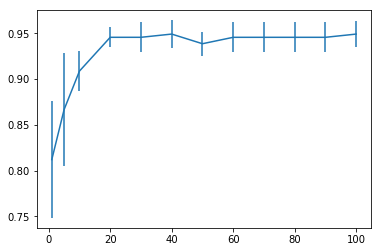

In [25]:
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

seleccion = SelectPercentile(f_classif)
pipe = Pipeline([('seleccion', seleccion), ('lr', LogisticRegression())])

score_means = list()
score_stds = list()
porcentajes = [1,5] + list(np.linspace(10,100,10))

for p in porcentajes:
    pipe.set_params(seleccion__percentile=p)
    this_scores = cross_val_score(pipe, X, Y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())
    
plt.errorbar(porcentajes, score_means, np.array(score_stds))
        

# <font color="#004D7F"> 5 Selección de Variables</font> 
## <font color="#004D7F"> Ranking por test ANOVA</font> 

### Evaluar algoritmo utilizando 2 métodos de selección ANOVA vs MI

M.I. -> Mutual Information

In [30]:
from sklearn.feature_selection import mutual_info_classif
# Seleccionar las 10 mejores segun test ANOVA
K = 10
ranking_F = SelectKBest(score_func = f_classif, k=K)
ranking_F.fit(X_t,Y_t)
X_seleccionF = ranking_F.transform(X_t)

# Seleccionar las 10 mejores por MI
K = 10
ranking_MI = SelectKBest(score_func = mutual_info_classif, k=K)
ranking_MI.fit(X_t,Y_t)
X_seleccionMI = ranking_MI.transform(X_t) # proyectar

# crear modelos
lr = LogisticRegression(); lr_F = LogisticRegression(); lr_MI = LogisticRegression();
lr.fit(X_t,Y_t); lr_F.fit(X_seleccionF,Y_t); lr_MI.fit(X_seleccionMI, Y_t)

# Proyectar test y validar modelos
XT_F =  ranking_F.transform(X_T); XT_MI = ranking_MI.transform(X_T)
score = lr.score(X_T, Y_T)
scoreF = lr_F.score(XT_F, Y_T)
scoreMI = lr_MI.score(XT_MI, Y_T)

print('Acc sin seleccion: {:.4f}'.format(score))
print('Acc con 10 mejores ANOVA: {:.4f}'.format(scoreF))
print('Acc con 10 mejores MI: {:.4f}'.format(scoreMI))

Acc sin seleccion: 0.9298
Acc con 10 mejores ANOVA: 0.9386
Acc con 10 mejores MI: 0.9474


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# <font color="#004D7F"> 5 Selección de Variables</font> 


### Seleccionar con Pipeline y CV
C.V. -> Cross Validation